In [982]:
import requests
import pandas as pd
from tqdm import tqdm
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


<h3><b>Thu Thập Dữ liệu</b></h3>
<hr>

<h5><i>Tôi dùng phương thức HTTP Requests vì tôi thấy trang web cung cấp hầu hết thông tin qua phương thức POST để xử lý dữ liệu, vì vậy chùng ta không cần phải sử dụng các thư viện khác.</i></h5>

![Information](Image/image.png)

=> link url crawl: https://ms.vietnamworks.com/job-search/v1.0/search

In [983]:
# # Payload and header of this web:
# payload = {
#   "hitsPerPage": 50,
#   "page": 0,
#   "retrieveFields": [
#   "address",
#   "benefits",
#   "jobTitle",
#   "isSalaryVisible",
#   "isShowLogo",
#   "companyLogo",
#   "userId",
#   "jobLevel",
#   "jobLevelId",
#   "jobLevelVI",
#   "jobId",
#   "companyId",
#   "approvedOn",
#   "isAnonymous",
#   "alias",
#   "expiredOn",
#   "industries",
#   "workingLocations",
#   "services",
#   "companyName",
#   "onlineOn",
#   "simpleServices",
#   "visibilityDisplay",
#   "isShowLogoInSearch",
#   "priorityOrder",
#   "skills",
#   "profilePublishedSiteMask",
#   "salary",
#   "salaryMin",
#   "salaryMax",
#   "prettySalary",
#   "jobDescription",
#   "jobRequirement",
#   "companySize",
#   "languageId",
#   "languageSelected",
#   "durationDays",
#   "numOfApplications",
#   "typeWorkingId"
# ]
# }

# headers = {
#     'Accept': '*/*',
#     'Accept-Language': 'en-US,en;q=0.9',
#     'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) \
#                    Chrome/115.0.0.0 Mobile Safari/537.36 Edg/115.0.1901.183',
#     'X-Source': 'Page-Container'
# }
# total_pages = 100
# offset = 100
# payload['hitsPerPage'] = offset
# result = []
# endpoint = 'https://ms.vietnamworks.com/job-search/v1.0/search'
# for i in tqdm(range(0,total_pages)):
#     payload['page'] = i
#     response = requests.post(endpoint,json = payload,headers = headers)
#     if response.status_code == 200:
#         print('Request page {} success!!!'.format(i+1)) 
#         for raw_data in response.json().get('data'):
#             result.append(raw_data)

# df = pd.DataFrame(result)
# df.to_csv('data/raw_data.csv',index=False)    

<hr>
<h3><b>Xử lý dữ liệu<b><h3>

In [984]:
df = pd.read_csv('data/raw_data.csv')
df.head(1)

jobId                      jobTitle  jobUrl   userId companyLogo  \
0  1680760  Nhân Viên Kinh Doanh MT - GT     NaN  7323468         NaN   

                          alias  createdOn                 approvedOn  \
0  nhan-vien-kinh-doanh-mt-gt-2        NaN  2023-08-11T11:22:45+07:00   

                   expiredOn  lastUpdatedOn  ...  isMobileHotJob  \
0  2023-09-10T23:59:59+07:00            NaN  ...            True   

  isMobileTopJob  isBoldAndRedJob  isUrgentJob  isUrgentJobM  \
0           True            False        False         False   

                    onlineOn  visibilityDisplay        priorityOrder  \
0  2023-08-11T11:22:45+07:00              False  2023-08-11T11:22:45   

   nearestGeoLoc  profilePublishedSiteMask  
0            NaN                         0  

[1 rows x 70 columns]

In [985]:
df.shape

(9000, 70)

In [986]:
#df.info()

<hr>
Lọc ra những cột thiếu giá trị, những cột không cần thiết để sau đó loại bỏ

In [987]:
list_drop = ['jobUrl','userId','companyLogo','alias', 'createdOn', 'approvedOn', 'expiredOn', 'lastUpdatedOn', 'lastSyncedOn', 
       'companyId', 'companyProfile', 'companySizeId',
       'contactName', 'createdBy', 'isOnline', 'isActive', 'isApproved',
       'isUnpaidDisable', 'isCompleted', 'isShowLogo', 'isShowLogoInSearch','languageSelectedId', 'redirectTo', 'requiredCoverLetter',
       'languageId', 'locations', 'canonical',
       'isShowContact', 'salaryRangeId', 'requiredResume',
       'companySizeVI', 'languageSelectedVI','simpleServices', 'services',
       'emailAddress', 'isMobileHotJob', 'isMobileTopJob',
       'isBoldAndRedJob', 'isUrgentJob', 'isUrgentJobM', 'onlineOn',
       'visibilityDisplay', 'priorityOrder', 'nearestGeoLoc','profilePublishedSiteMask']
df = df.drop(list_drop, axis=1)

In [988]:
df.columns.size

25

<hr>
Kiểm tra cột có dữ liệu trống, dữ liệu bằng 0, dữ liệu trùng lặp



In [989]:
df = df.dropna(axis=1, how='all')
df.columns.size

24

In [990]:
df = df.loc[:,(df != 0).any(axis = 0)]
df.columns.size

24

In [991]:
df = df.drop_duplicates(keep = 'first')
df.shape

(8978, 24)

In [992]:
df.head(1)

jobId                      jobTitle                 companyName  \
0  1680760  Nhân Viên Kinh Doanh MT - GT  Công Ty Cổ Phần S77 Hà Nội   

   isAnonymous  isSalaryVisible  \
0        False             True   

                                      jobDescription  \
0  1. Doanh số bán hàng\n- Thực hiện bán hàng the...   

                                      jobRequirement  jobLevelId  salary  \
0  - Ít nhất 1 năm kinh nghiệm ở vị trí tương đươ...           5     700   

   salaryMax  ...                                   workingLocations  address  \
0        700  ...  [{'workingLocationId': 130191, 'addressId': 74...   Hà Nội   

                                          industries  \
0  [{'industryId': 11, 'industryName': 'Customer ...   

                    jobLevel jobLevelVI companySize languageSelected  \
0  Experienced (non-manager)  Nhân viên       10-24              Any   

  prettySalary durationDays numOfApplications  
0  $500 - $700           30                 0  

[1 rows x 24 columns]

<hr>
<h5><i>Xử lý cột</b></i></h5>
<h3>1.companySize<h3>


In [993]:
df['companySize'].value_counts()

companySize
100-499          2256
25-99            1793
1,000-4,999      1207
500-999           763
10-24             667
5,000-9,999       329
10,000-19,999     215
Less Than 10      108
20,000-49,999      43
Over 50,000        42
Name: count, dtype: int64

In [994]:
#biến đổi chuỗi về tuple
def clean_companySize(s): 
    if s == "100-499": return (100, 499)
    elif s == "25-99": return (25, 99)
    elif s == "1,000-4,999": return (1000, 4999)
    elif s == "500-999": return (500, 999)
    elif s == "10-24": return (10, 24)
    elif s == "5,000-9,999": return (5000, 9999)
    elif s == "10,000-19,999": return (10000, 19999)
    elif s == "Less Than 10": return (0, 10)
    elif s == "20,000-49,999": return (20000, 49999)
    elif s == "Over 50,000": return (50000, 99999)
    else: return None
#thay thế vào giá trị trong cột cũ
temp_df = df.copy()
temp_df['companySize'] = df['companySize'].apply(lambda s: clean_companySize(s))
temp_df['companySize'].value_counts().sum()

7423

In [995]:
temp_df.head(5)

jobId                                           jobTitle  \
0  1680760                       Nhân Viên Kinh Doanh MT - GT   
1  1680765      Social Media Specialist (Full Time/part-Time)   
2  1680758                                   Kế Toán Tổng Hợp   
3  1680741                                    Marketing Staff   
4  1680162  Chuyên Viên Chính Quan Hệ Khách Hàng Ưu Tiên -...   

                              companyName  isAnonymous  isSalaryVisible  \
0              Công Ty Cổ Phần S77 Hà Nội        False             True   
1  Công Ty TNHH Jung Wisdom International        False            False   
2              Công Ty Cổ Phần S77 Hà Nội        False             True   
3   Công Ty TNHH Bán Lẻ Fujimart Việt Nam        False            False   
4           Ngân Hàng TMCP Quốc Dân (Ncb)        False            False   

                                      jobDescription  \
0  1. Doanh số bán hàng\n- Thực hiện bán hàng the...   
1  WE’RE HIRING: SOCIAL MEDIA SPECIALIST (FULL TI...   
2  - Ghi nhận kiểm tra các nghiệp vụ phát sinh và...   
3  -\tIn charge of trade marketing activities, co...   
4  - Thực hiện hoạt động tìm kiếm, phát triển và ...   

                                      jobRequirement  jobLevelId  salary  \
0  - Ít nhất 1 năm kinh nghiệm ở vị trí tương đươ...           5     700   
1  QUALIFICATIONS\n- Fluent in English (IELTS or ...           5       0   
2  1. Tuổi: Từ 25\n2. Bằng cấp: Cao đẳng/Đại Học\...           5     700   
3  -\tBachelor degree of Marketing/ Business Admi...           5       0   
4  - Tốt nghiệp chuyên ngành Tài chính-ngân hàng,...           5       0   

   salaryMax  ...                                   workingLocations  \
0        700  ...  [{'workingLocationId': 130191, 'addressId': 74...   
1          0  ...  [{'workingLocationId': 130179, 'addressId': 74...   
2        700  ...  [{'workingLocationId': 130191, 'addressId': 74...   
3          0  ...  [{'workingLocationId': 88326, 'addressId': 515...   
4          0  ...  [{'workingLocationId': 83892, 'addressId': 350...   

                                             address  \
0                                             Hà Nội   
1  No.298, Vo Chi Cong street, Xuan La Ward, Tay ...   
2                                             Hà Nội   
3  Tầng 6, 51 Phố Lê Đại Hành, Quận Hai Bà Trưng,...   
4          28C-28D Bà Triệu, Phường Hàng Bài, Hà Nội   

                                          industries  \
0  [{'industryId': 11, 'industryName': 'Customer ...   
1  [{'industryId': 3, 'industryName': 'Advertisin...   
2  [{'industryId': 1, 'industryName': 'Accounting...   
3  [{'industryId': 3, 'industryName': 'Advertisin...   
4  [{'industryId': 33, 'industryName': 'Sales', '...   

                    jobLevel jobLevelVI companySize languageSelected  \
0  Experienced (non-manager)  Nhân viên    (10, 24)              Any   
1  Experienced (non-manager)  Nhân viên    (25, 99)          English   
2  Experienced (non-manager)  Nhân viên    (10, 24)              Any   
3  Experienced (non-manager)  Nhân viên        None              Any   
4  Experienced (non-manager)  Nhân viên        None       Vietnamese   

   prettySalary durationDays numOfApplications  
0   $500 - $700           30                 0  
1  Thương lượng           30                 0  
2   $500 - $700           30                 0  
3  Thương lượng           30                 0  
4  Thương lượng           30                 0  

[5 rows x 24 columns]

<h3>2.workingLocation<h3>

In [996]:
temp_df["workingLocations"].value_counts()

workingLocations
[{'workingLocationId': 119997, 'addressId': 774, 'cityId': 24, 'districtId': 0, 'address': 'Hà Nội, Vietnam', 'geoLoc': {'lat': 21.027764, 'lon': 105.83416}, 'cityName': 'Ha Noi', 'cityNameVI': 'Hà Nội'}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                 42
[{'workingLocationId': 17, 'addressId': 14572, 'cityId': 24, 'districtId': 10, 'address': 'Hà Nội, Việt Nam', 'geoLoc': {'lat': 21.027764, 'lon': 105.83416}, 'cityName': 'Ha Noi', 'cityNameVI': 'Hà Nội'}]                                                                                                                           

In [997]:
temp_df = temp_df.dropna(subset=['workingLocations'])
temp_df['workingLocations'] = temp_df['workingLocations'].apply(ast.literal_eval)
def clean_workingLocations(x):
    cityName = {} 
    for i in x: 
        cityName[i.get("cityId")] = i.get("cityNameVI")
    return cityName
temp_df['workingLocations'] = temp_df['workingLocations'].apply(lambda x: clean_workingLocations(x))
temp_df['workingLocations']

0         {24: 'Hà Nội'}
1         {24: 'Hà Nội'}
2         {24: 'Hà Nội'}
3         {24: 'Hà Nội'}
4         {24: 'Hà Nội'}
              ...       
8995      {24: 'Hà Nội'}
8996      {24: 'Hà Nội'}
8997    {37: 'Lạng Sơn'}
8998      {24: 'Hà Nội'}
8999      {24: 'Hà Nội'}
Name: workingLocations, Length: 8974, dtype: object

<h3><i>3. Tương Tự với 2 cột "skills", "benefits"</h3>

In [998]:
temp_df = temp_df.dropna(subset=['skills'])
temp_df['skills'] = temp_df['skills'].apply(ast.literal_eval)
temp_df['benefits'] = temp_df['benefits'].apply(ast.literal_eval)
temp_df['industries'] = temp_df['industries'].apply(ast.literal_eval)

In [999]:
def clean_skills(x):
    skills= {} 
    for i in x: 
        skills[i.get("skillId")] = i.get("skillName")
    return skills

def clean_benefits(x):
    benefits= {} 
    for i in x: 
        benefits[i.get("benefitId")] = i.get("benefitName")
    return benefits
def clean_industries(x): 
    industries= {} 
    for i in x: 
        industries[i.get("industryId")] = i.get("industryName")
    return industries

In [1000]:
temp_df['skills'] = temp_df['skills'].apply(lambda x: clean_skills(x))
temp_df['benefits'] = temp_df['benefits'].apply(lambda x: clean_benefits(x))
temp_df['industries'] = temp_df['industries'].apply(lambda x: clean_industries(x))
temp_df[['skills', 'benefits','industries']]

skills  \
0     {1919: 'Kênh MT', 1921: 'Hàng Tiêu Dùng', 666:...   
1     {27810: 'Marketing Materials Strategy', 333851...   
2     {93: 'Kế Toán Tổng Hợp', 941661: 'Hạch Toán Ch...   
3     {100: 'English', 651: 'Trade Marketing', 15900...   
4     {17750: 'Tìm Kiếm Khách Hàng', 354: 'Chăm Sóc ...   
...                                                 ...   
8995  {618943: 'Government Organizations', 236965: '...   
8996  {618943: 'Government Organizations', 941031: '...   
8997  {67: 'Xuất Nhập Khẩu', 26367: 'Booking', 23667...   
8998  {9428: 'Chinese', 346516: 'Business Deveplomen...   
8999  {184: 'Risk', 29886: 'Business consulting', 16...   

                                               benefits  \
0     {1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...   
1     {1: 'Bonus', 2: 'Healthcare Plan', 4: 'Training'}   
2     {1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...   
3     {1: 'Bonus', 2: 'Healthcare Plan', 9: 'Travel ...   
4              {1: 'Bonus', 4: 'Training', 5: 'Awards'}   
...                                                 ...   
8995            {1: 'Bonus', 5: 'Awards', 15: 'Others'}   
8996            {1: 'Bonus', 5: 'Awards', 15: 'Others'}   
8997  {2: 'Healthcare Plan', 3: 'Paid Leave', 10: 'T...   
8998            {1: 'Bonus', 5: 'Awards', 15: 'Others'}   
8999            {1: 'Bonus', 5: 'Awards', 15: 'Others'}   

                                             industries  
0     {11: 'Customer Service', 32: 'Retail/Wholesale...  
1     {3: 'Advertising/Promotion/PR', 27: 'Marketing...  
2     {1: 'Accounting', 58: 'Auditing', 59: 'Finance...  
3     {3: 'Advertising/Promotion/PR', 27: 'Marketing...  
4     {33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...  
...                                                 ...  
8995  {8: 'Consulting', 58: 'Auditing', 69: 'Plannin...  
8996  {8: 'Consulting', 58: 'Auditing', 69: 'Plannin...  
8997     {19: 'Export-Import', 36: 'Freight/Logistics'}  
8998  {8: 'Consulting', 11: 'Customer Service', 58: ...  
8999  {8: 'Consulting', 58: 'Auditing', 59: 'Finance...  

[8972 rows x 3 columns]

<hr>
<h3>4.typeWorkingId</h3>

In [1001]:
temp_df["typeWorkingId"].value_counts().sort_index().index

Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='typeWorkingId')

In [1002]:
def convert_typeWorkingName(id):
    if (id == 1):
        return 'Full-time'
    elif (id == 2):
        return 'Part-time'
    elif (id == 3):
        return 'Internship'
    elif (id == 4):
        return 'Online jobs'
    elif (id == 5):
        return 'Freelancer'
    elif (id == 6):
        return 'Seasonal'
    else:
        return 'Other'

In [1003]:
temp_df['typeWorkingName'] = [convert_typeWorkingName(x) for x in temp_df['typeWorkingId']]


In [1004]:
missing_values = temp_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

jobDescription       2
address            192
companySize       1554
dtype: int64


In [1005]:
columns_with_zero = (temp_df == 0).any()
print(columns_with_zero[columns_with_zero].index)

Index(['isAnonymous', 'isSalaryVisible', 'salary', 'salaryMax', 'salaryMin',
       'numOfApplications'],
      dtype='object')


In [1006]:
mode_value = temp_df['companySize'].mode().values[0]
temp_df['companySize'].fillna(temp_df['companySize'].apply(lambda x: mode_value if pd.isnull(x) else x), inplace = True)

In [1007]:
temp_df.to_csv('data/new_data.csv',index = False)

<hr>
<h3><b>Trực Quan Dữ Liệu<b><h3>

In [1008]:
df = pd.read_csv('data/new_data.csv')
df.head()

jobId                                           jobTitle  \
0  1680760                       Nhân Viên Kinh Doanh MT - GT   
1  1680765      Social Media Specialist (Full Time/part-Time)   
2  1680758                                   Kế Toán Tổng Hợp   
3  1680741                                    Marketing Staff   
4  1680162  Chuyên Viên Chính Quan Hệ Khách Hàng Ưu Tiên -...   

                              companyName  isAnonymous  isSalaryVisible  \
0              Công Ty Cổ Phần S77 Hà Nội        False             True   
1  Công Ty TNHH Jung Wisdom International        False            False   
2              Công Ty Cổ Phần S77 Hà Nội        False             True   
3   Công Ty TNHH Bán Lẻ Fujimart Việt Nam        False            False   
4           Ngân Hàng TMCP Quốc Dân (Ncb)        False            False   

                                      jobDescription  \
0  1. Doanh số bán hàng\n- Thực hiện bán hàng the...   
1  WE’RE HIRING: SOCIAL MEDIA SPECIALIST (FULL TI...   
2  - Ghi nhận kiểm tra các nghiệp vụ phát sinh và...   
3  -\tIn charge of trade marketing activities, co...   
4  - Thực hiện hoạt động tìm kiếm, phát triển và ...   

                                      jobRequirement  jobLevelId  salary  \
0  - Ít nhất 1 năm kinh nghiệm ở vị trí tương đươ...           5     700   
1  QUALIFICATIONS\n- Fluent in English (IELTS or ...           5       0   
2  1. Tuổi: Từ 25\n2. Bằng cấp: Cao đẳng/Đại Học\...           5     700   
3  -\tBachelor degree of Marketing/ Business Admi...           5       0   
4  - Tốt nghiệp chuyên ngành Tài chính-ngân hàng,...           5       0   

   salaryMax  ...                                            address  \
0        700  ...                                             Hà Nội   
1          0  ...  No.298, Vo Chi Cong street, Xuan La Ward, Tay ...   
2        700  ...                                             Hà Nội   
3          0  ...  Tầng 6, 51 Phố Lê Đại Hành, Quận Hai Bà Trưng,...   
4          0  ...          28C-28D Bà Triệu, Phường Hàng Bài, Hà Nội   

                                          industries  \
0  {11: 'Customer Service', 32: 'Retail/Wholesale...   
1  {3: 'Advertising/Promotion/PR', 27: 'Marketing...   
2  {1: 'Accounting', 58: 'Auditing', 59: 'Finance...   
3  {3: 'Advertising/Promotion/PR', 27: 'Marketing...   
4  {33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...   

                    jobLevel jobLevelVI companySize languageSelected  \
0  Experienced (non-manager)  Nhân viên    (10, 24)              Any   
1  Experienced (non-manager)  Nhân viên    (25, 99)          English   
2  Experienced (non-manager)  Nhân viên    (10, 24)              Any   
3  Experienced (non-manager)  Nhân viên  (100, 499)              Any   
4  Experienced (non-manager)  Nhân viên  (100, 499)       Vietnamese   

   prettySalary durationDays numOfApplications typeWorkingName  
0   $500 - $700           30                 0       Full-time  
1  Thương lượng           30                 0       Full-time  
2   $500 - $700           30                 0       Full-time  
3  Thương lượng           30                 0       Full-time  
4  Thương lượng           30                 0       Full-time  

[5 rows x 25 columns]

In [1009]:
type_working = pd.Series(df['typeWorkingName'].value_counts())
type_working

typeWorkingName
Full-time      8848
Part-time        46
Internship       29
Freelancer       26
Other            11
Seasonal         10
Online jobs       2
Name: count, dtype: int64

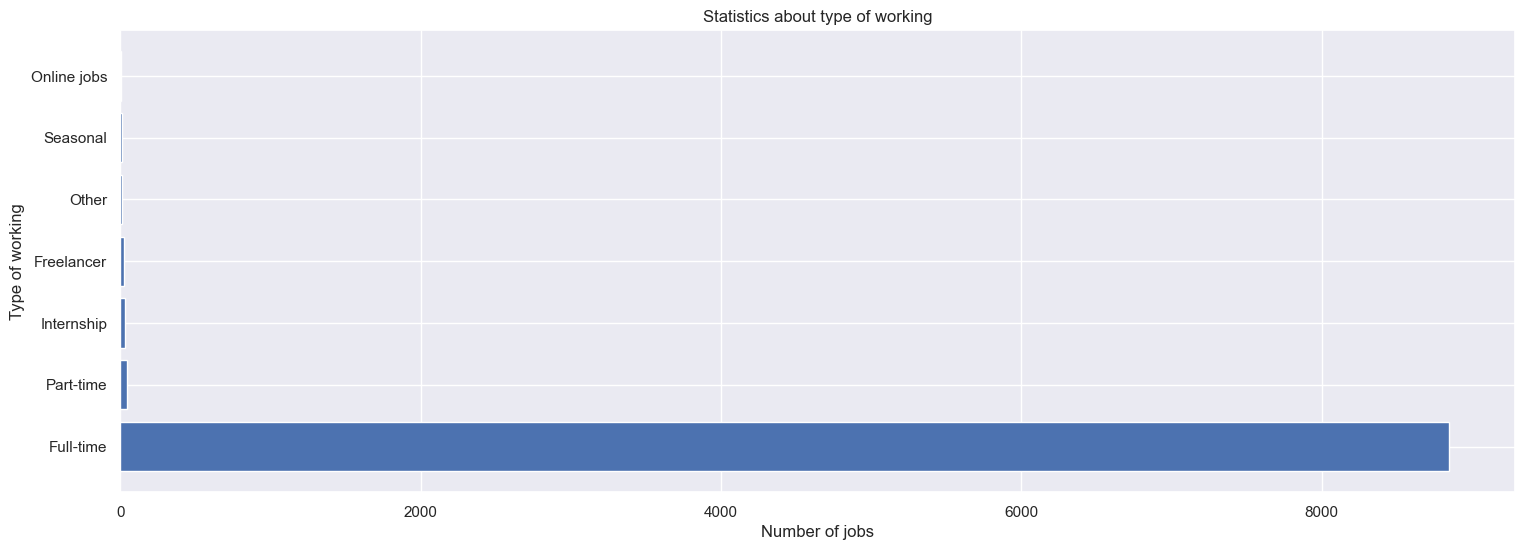

In [1010]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.barh(type_working.index, type_working.values)
plt.title('Statistics about type of working')
plt.ylabel('Type of working')
plt.xlabel('Number of jobs');
plt.show()

In [1011]:
df['benefits']

0       {1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...
1       {1: 'Bonus', 2: 'Healthcare Plan', 4: 'Training'}
2       {1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...
3       {1: 'Bonus', 2: 'Healthcare Plan', 9: 'Travel ...
4                {1: 'Bonus', 4: 'Training', 5: 'Awards'}
                              ...                        
8967              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8968              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8969    {2: 'Healthcare Plan', 3: 'Paid Leave', 10: 'T...
8970              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8971              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
Name: benefits, Length: 8972, dtype: object

In [1012]:
df['benefits'] = df['benefits'].apply(eval)
benefits_data =[]
for i in df['benefits']:
    for j in i.values():
        benefits_data.append(j)
benefits = pd.Series(pd.Series(benefits_data).value_counts())
benefits

Bonus                   7601
Healthcare Plan         5564
Training                2542
Paid Leave              2162
Others                  2051
Travel Opportunities    1534
Team Activities         1044
Awards                   810
Transportation           792
Laptop                   614
Canteen                  375
Vouchers                 194
Mobile                    91
Library                   56
Kindergarten              29
Name: count, dtype: int64

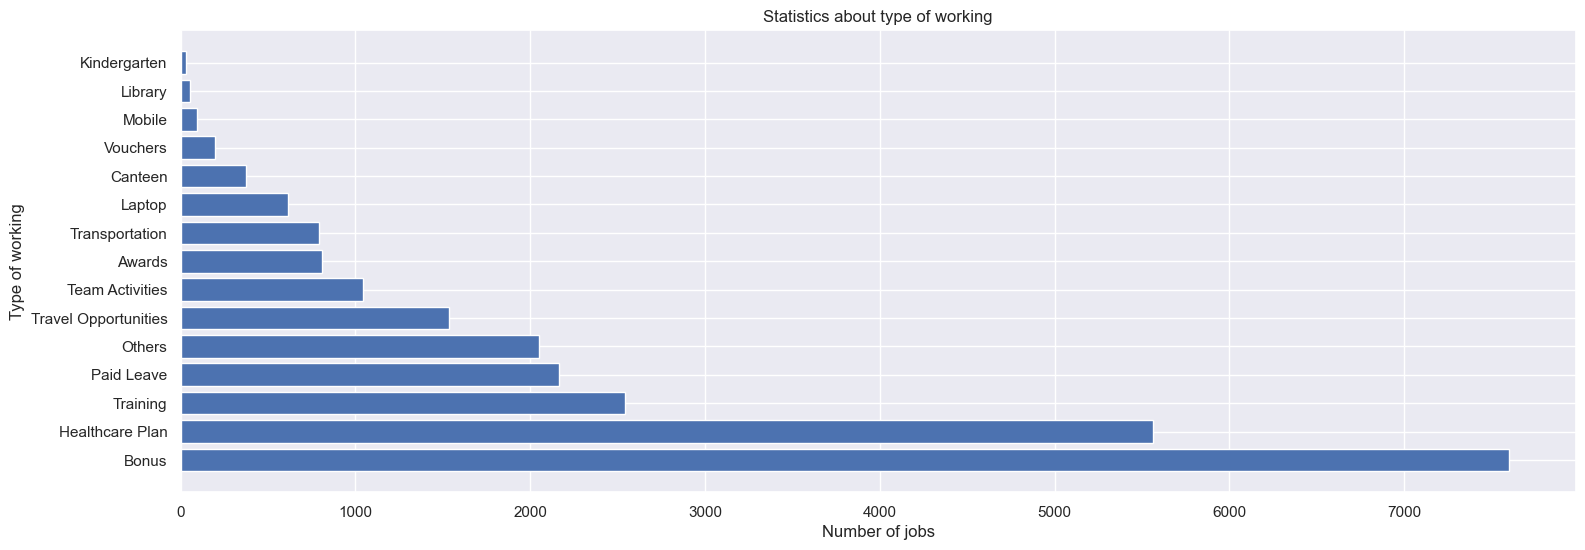

In [1013]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.barh(benefits.index, benefits.values)
plt.title('Statistics about type of working')
plt.ylabel('Type of working')
plt.xlabel('Number of jobs');
plt.show()

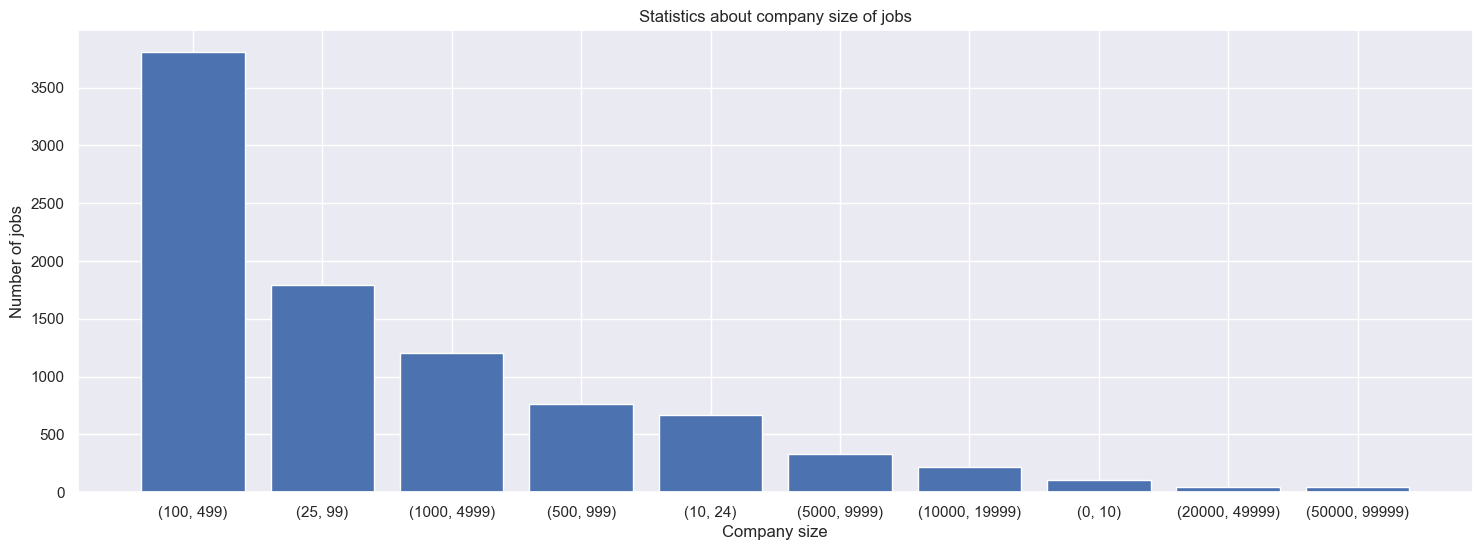

In [1014]:
company_size = pd.Series(df['companySize'].value_counts())
company_size
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
# sns.countplot(data = df, x = 'companySize', order = df['companySize'].value_counts().index);
plt.bar(company_size.index, company_size.values)
plt.title('Statistics about company size of jobs')
plt.xlabel('Company size')
plt.ylabel('Number of jobs');

In [1015]:
job_level = pd.Series(df['jobLevel'].value_counts())
job_level

jobLevel
Experienced (non-manager)    5956
Manager                      1461
Fresher/Entry level          1154
Director and above            236
Intern/Student                165
Name: count, dtype: int64

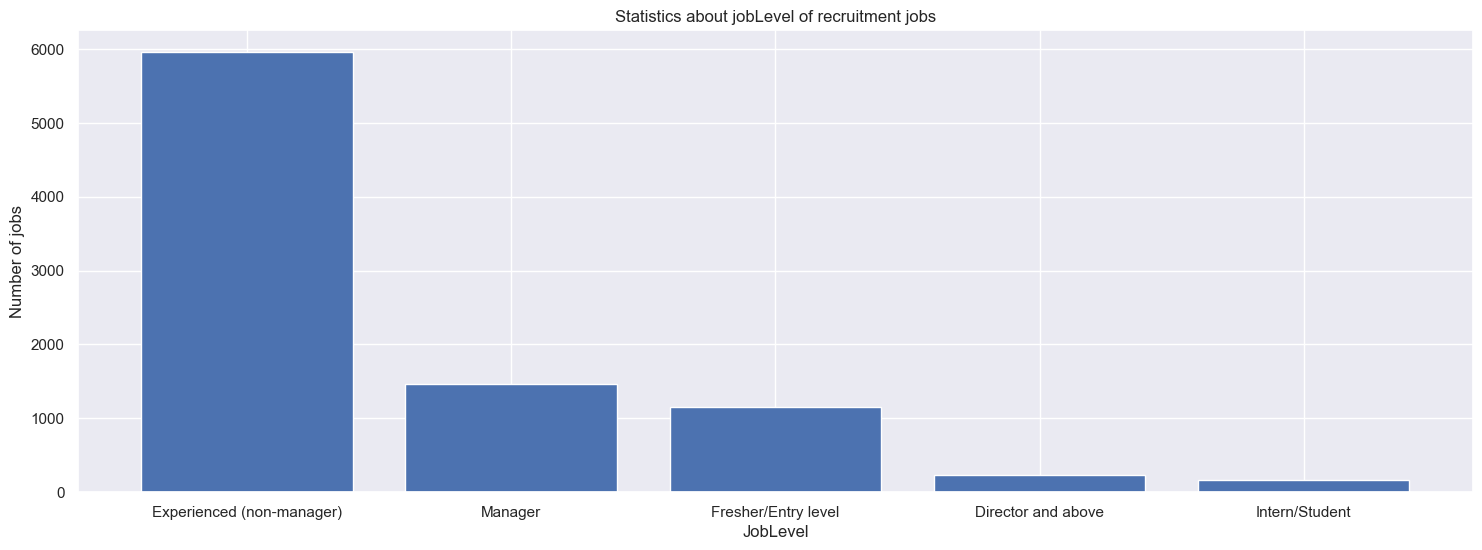

In [1016]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.bar(job_level.index,job_level.values)
plt.title('Statistics about jobLevel of recruitment jobs')
plt.ylabel('Number of jobs')
plt.xlabel('JobLevel');

In [1017]:
df['companyName'].value_counts()
company_name = pd.Series(df['companyName'].value_counts())
top_20_companies = company_name[:20]

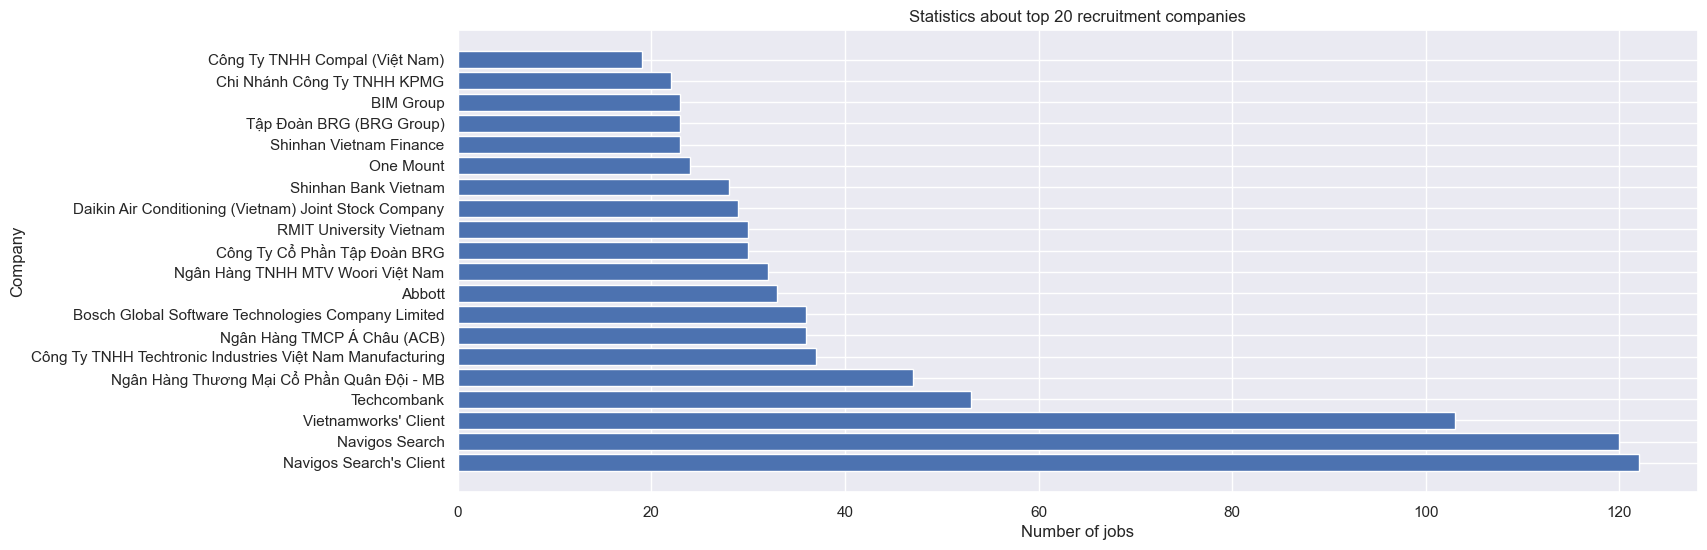

In [1018]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (16,6))
# sns.barplot(y =company_name[:20].index, x = company_name[:20].values)
plt.barh(top_20_companies.index, top_20_companies.values)
plt.title('Statistics about top 20 recruitment companies')
plt.xlabel('Number of jobs')
plt.ylabel('Company');

In [1019]:
df['workingLocations'] = df['workingLocations'].apply(eval)
locations_data =[]
for i in df['workingLocations']:
    for j in i.values():
        locations_data.append(j)

In [1020]:
locations = pd.Series(pd.Series(locations_data).value_counts())[0:20]
locations

Hà Nội               3980
Hồ Chí Minh          3949
Hải Phòng             278
Bình Dương            277
Bắc Ninh              266
Hưng Yên              239
Đồng Nai              214
Đà Nẵng               193
Hải Dương             190
Hà Nam                108
Long An                93
Bắc Giang              93
Bà Rịa - Vũng Tàu      91
Vĩnh Phúc              88
Cần Thơ                50
Quảng Nam              46
Quốc tế                44
Quảng Ninh             40
Thái Nguyên            39
Thanh Hóa              39
Name: count, dtype: int64

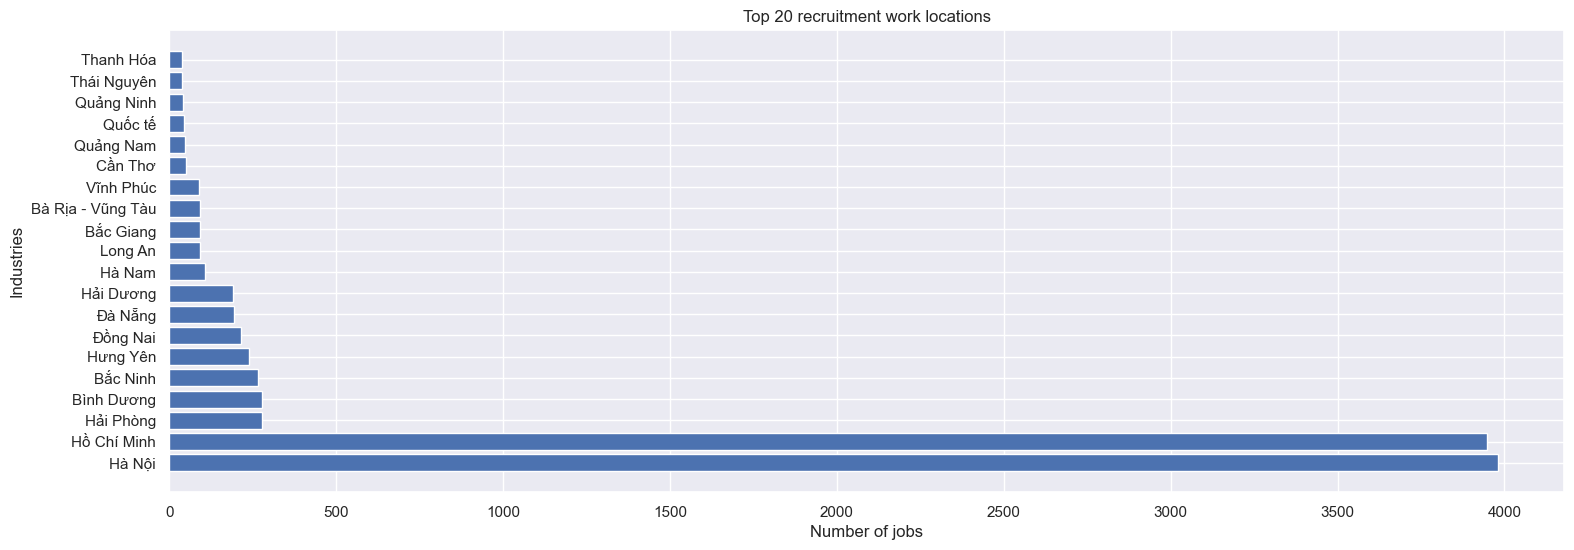

In [1021]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (18,6))
# sns.barplot(y =locations.index, x = locations.values)
plt.barh(locations.index,locations.values)
plt.title('Top 20 recruitment work locations')
plt.xlabel('Number of jobs')
plt.ylabel('Industries');

In [1022]:
df['skills'] = df['skills'].apply(eval)
skills_data =[]
for i in df['skills']:
    for j in i.values():
        skills_data.append(j)

In [1023]:
skills = pd.Series(pd.Series(skills_data).value_counts())[0:20]
skills

English                 782
Kinh Doanh              583
Chăm Sóc Khách Hàng     516
Bán Hàng                504
Tiếng Anh               494
Tìm Kiếm Khách Hàng     330
AutoCAD                 257
Business Development    253
Kế Toán                 247
Communication           232
Tài Chính               225
Digital Marketing       205
Customer Service        200
Tư Vấn                  196
Tiếng Trung             184
Accounting              176
Kế Toán Tổng Hợp        162
Cơ Khí                  145
Kiểm Toán               138
Ngân Hàng               138
Name: count, dtype: int64

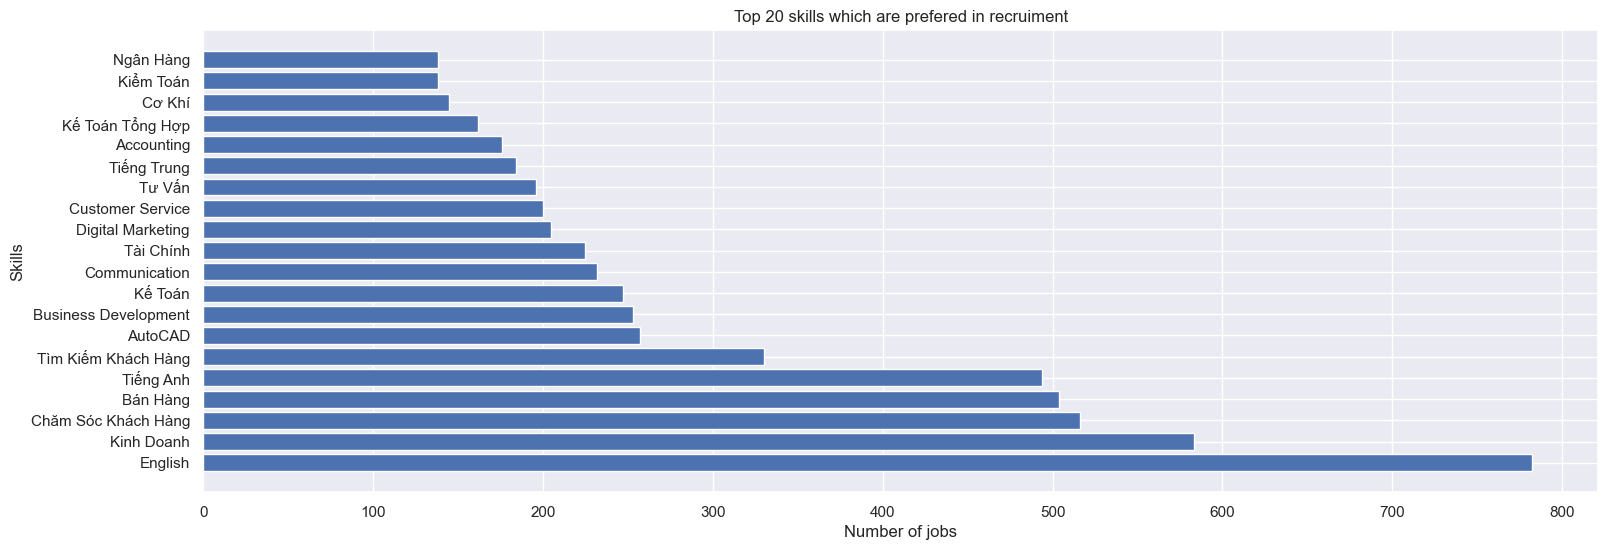

In [1024]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (18,6))
# sns.barplot(y =skills.index, x = skills.values)
plt.barh(skills.index,skills.values)
plt.title('Top 20 skills which are prefered in recruiment')
plt.xlabel('Number of jobs')
plt.ylabel('Skills');

In [1025]:
df[df['isSalaryVisible'] == True]['isSalaryVisible'].count()
# Because a lot of value of salary are "Thương lượng", so we will only
# use data which has the range of salary exactly
temp_df = df[df['isSalaryVisible'] == True]

In [1026]:
locations_salary_df = temp_df[['workingLocations','salary']].copy()
locations_salary_df['workingLocations'] = locations_salary_df['workingLocations']\
                                    .astype(str)\
                                    .apply(lambda x: list(ast.literal_eval(x).values()))
locations_salary_df = locations_salary_df.explode('workingLocations')

In [1027]:
avg_salary = round(locations_salary_df.groupby('workingLocations')['salary'].mean().reset_index())
avg_salary = avg_salary.rename(columns = {'salary': 'avgsalary'})
avg_salary

workingLocations  avgsalary
0            An Giang     1750.0
1   Bà Rịa - Vũng Tàu     1191.0
2          Bình Dương     1166.0
3          Bình Phước      875.0
4          Bình Thuận      960.0
5           Bình Định     1992.0
6            Bạc Liêu     1125.0
7           Bắc Giang     1109.0
8             Bắc Kạn     1500.0
9            Bắc Ninh     1042.0
10            Bến Tre     1017.0
11            Cần Thơ      958.0
12            Gia Lai     1225.0
13             Hà Nam     1105.0
14             Hà Nội     1309.0
15            Hà Tĩnh      650.0
16           Hòa Bình      707.0
17           Hưng Yên     1115.0
18          Hải Dương      955.0
19          Hải Phòng     1102.0
20          Hậu Giang      500.0
21        Hồ Chí Minh     1459.0
22               Khác     1692.0
23          Khánh Hòa     1220.0
24         Kiên Giang     1392.0
25            Long An     1309.0
26            Lào Cai     1200.0
27           Lâm Đồng      950.0
28           Lạng Sơn     1030.0
29           Nam Định     1564.0
30            Nghệ An      941.0
31          Ninh Bình      838.0
32         Ninh Thuận     2200.0
33            Phú Thọ     1047.0
34            Phú Yên     1500.0
35         Quảng Bình     2000.0
36          Quảng Nam     1745.0
37         Quảng Ngãi     1150.0
38         Quảng Ninh     1463.0
39            Quốc tế     4085.0
40          Sóc Trăng     2000.0
41             Sơn La     1250.0
42          Thanh Hóa     1018.0
43          Thái Bình      825.0
44        Thái Nguyên     1197.0
45     Thừa Thiên Huế     1233.0
46         Tiền Giang      893.0
47           Trà Vinh      750.0
48        Tuyên Quang     3000.0
49           Tây Ninh     1255.0
50          Vĩnh Long     1200.0
51          Vĩnh Phúc      909.0
52            Yên Bái      600.0
53              ĐBSCL      200.0
54          Điện Biên     1500.0
55            Đà Nẵng     1444.0
56            Đắk Lắk      700.0
57           Đồng Nai     1185.0
58          Đồng Tháp     1000.0

In [1028]:
locations_jobs = locations_salary_df.groupby('workingLocations').count().reset_index()
locations_jobs = locations_jobs.rename(columns = {'salary': 'numberOfjobs'})
locations_jobs

workingLocations  numberOfjobs
0            An Giang             2
1   Bà Rịa - Vũng Tàu            25
2          Bình Dương            62
3          Bình Phước             8
4          Bình Thuận             2
5           Bình Định             6
6            Bạc Liêu             2
7           Bắc Giang            46
8             Bắc Kạn             2
9            Bắc Ninh           101
10            Bến Tre             6
11            Cần Thơ            12
12            Gia Lai             4
13             Hà Nam            44
14             Hà Nội          1695
15            Hà Tĩnh             2
16           Hòa Bình             3
17           Hưng Yên            61
18          Hải Dương            55
19          Hải Phòng            92
20          Hậu Giang             1
21        Hồ Chí Minh          1307
22               Khác             6
23          Khánh Hòa             5
24         Kiên Giang             9
25            Long An            27
26            Lào Cai             3
27           Lâm Đồng             2
28           Lạng Sơn             5
29           Nam Định             5
30            Nghệ An            11
31          Ninh Bình             8
32         Ninh Thuận             1
33            Phú Thọ             9
34            Phú Yên             1
35         Quảng Bình             1
36          Quảng Nam            11
37         Quảng Ngãi             7
38         Quảng Ninh            15
39            Quốc tế            26
40          Sóc Trăng             1
41             Sơn La             2
42          Thanh Hóa            15
43          Thái Bình             4
44        Thái Nguyên            24
45     Thừa Thiên Huế             9
46         Tiền Giang             7
47           Trà Vinh             2
48        Tuyên Quang             1
49           Tây Ninh             6
50          Vĩnh Long             1
51          Vĩnh Phúc            51
52            Yên Bái             1
53              ĐBSCL             1
54          Điện Biên             2
55            Đà Nẵng            56
56            Đắk Lắk             3
57           Đồng Nai            41
58          Đồng Tháp             1

In [1029]:
locations_df = pd.concat([locations_jobs, avg_salary['avgsalary']], axis=1)
locations_df

workingLocations  numberOfjobs  avgsalary
0            An Giang             2     1750.0
1   Bà Rịa - Vũng Tàu            25     1191.0
2          Bình Dương            62     1166.0
3          Bình Phước             8      875.0
4          Bình Thuận             2      960.0
5           Bình Định             6     1992.0
6            Bạc Liêu             2     1125.0
7           Bắc Giang            46     1109.0
8             Bắc Kạn             2     1500.0
9            Bắc Ninh           101     1042.0
10            Bến Tre             6     1017.0
11            Cần Thơ            12      958.0
12            Gia Lai             4     1225.0
13             Hà Nam            44     1105.0
14             Hà Nội          1695     1309.0
15            Hà Tĩnh             2      650.0
16           Hòa Bình             3      707.0
17           Hưng Yên            61     1115.0
18          Hải Dương            55      955.0
19          Hải Phòng            92     1102.0
20          Hậu Giang             1      500.0
21        Hồ Chí Minh          1307     1459.0
22               Khác             6     1692.0
23          Khánh Hòa             5     1220.0
24         Kiên Giang             9     1392.0
25            Long An            27     1309.0
26            Lào Cai             3     1200.0
27           Lâm Đồng             2      950.0
28           Lạng Sơn             5     1030.0
29           Nam Định             5     1564.0
30            Nghệ An            11      941.0
31          Ninh Bình             8      838.0
32         Ninh Thuận             1     2200.0
33            Phú Thọ             9     1047.0
34            Phú Yên             1     1500.0
35         Quảng Bình             1     2000.0
36          Quảng Nam            11     1745.0
37         Quảng Ngãi             7     1150.0
38         Quảng Ninh            15     1463.0
39            Quốc tế            26     4085.0
40          Sóc Trăng             1     2000.0
41             Sơn La             2     1250.0
42          Thanh Hóa            15     1018.0
43          Thái Bình             4      825.0
44        Thái Nguyên            24     1197.0
45     Thừa Thiên Huế             9     1233.0
46         Tiền Giang             7      893.0
47           Trà Vinh             2      750.0
48        Tuyên Quang             1     3000.0
49           Tây Ninh             6     1255.0
50          Vĩnh Long             1     1200.0
51          Vĩnh Phúc            51      909.0
52            Yên Bái             1      600.0
53              ĐBSCL             1      200.0
54          Điện Biên             2     1500.0
55            Đà Nẵng            56     1444.0
56            Đắk Lắk             3      700.0
57           Đồng Nai            41     1185.0
58          Đồng Tháp             1     1000.0

In [1030]:
locations_avg_salary_df = locations_df.sort_values\
                    (by = 'avgsalary', ascending = False)[:10]

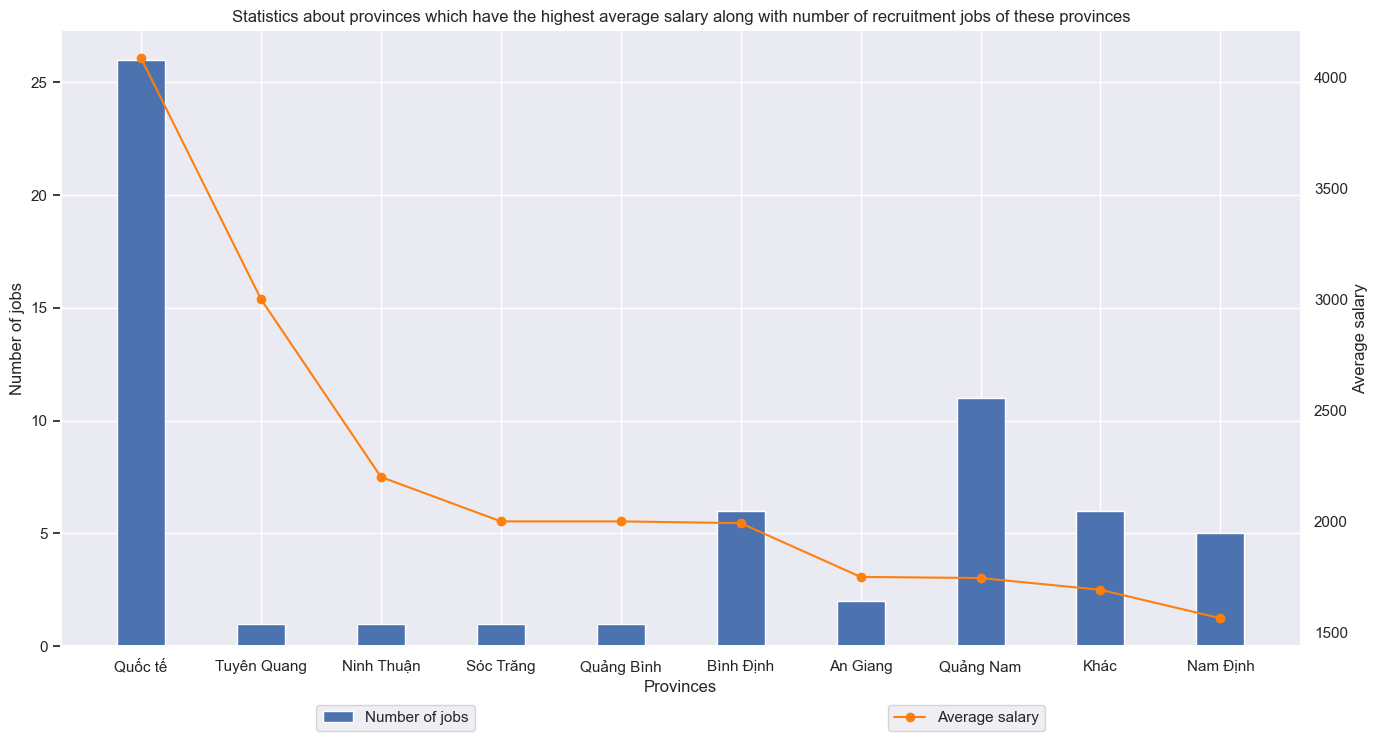

In [1031]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(locations_avg_salary_df['workingLocations'],\
        locations_avg_salary_df['numberOfjobs'],width = 0.4)
ax.set_xlabel('Provinces')
ax.set_ylabel('Number of jobs')
ax.tick_params(left=False)
ax.legend(['Number of jobs'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twinx()
ax2.plot(locations_avg_salary_df['workingLocations'],\
          locations_avg_salary_df['avgsalary'],marker='o',color='#fe7f0e')
ax2.set_ylabel('Average salary')
ax2.grid(False)
ax2.tick_params(right=False)
ax2.legend(['Average salary'],loc='lower right',bbox_to_anchor=(0.8, -0.15))

plt.title('Statistics about provinces which have the highest average salary \
along with number of recruitment jobs of these provinces')
plt.show()

In [1032]:
locations_number_jobs_df = locations_df.sort_values\
                    (by = 'numberOfjobs', ascending = False)[:10]

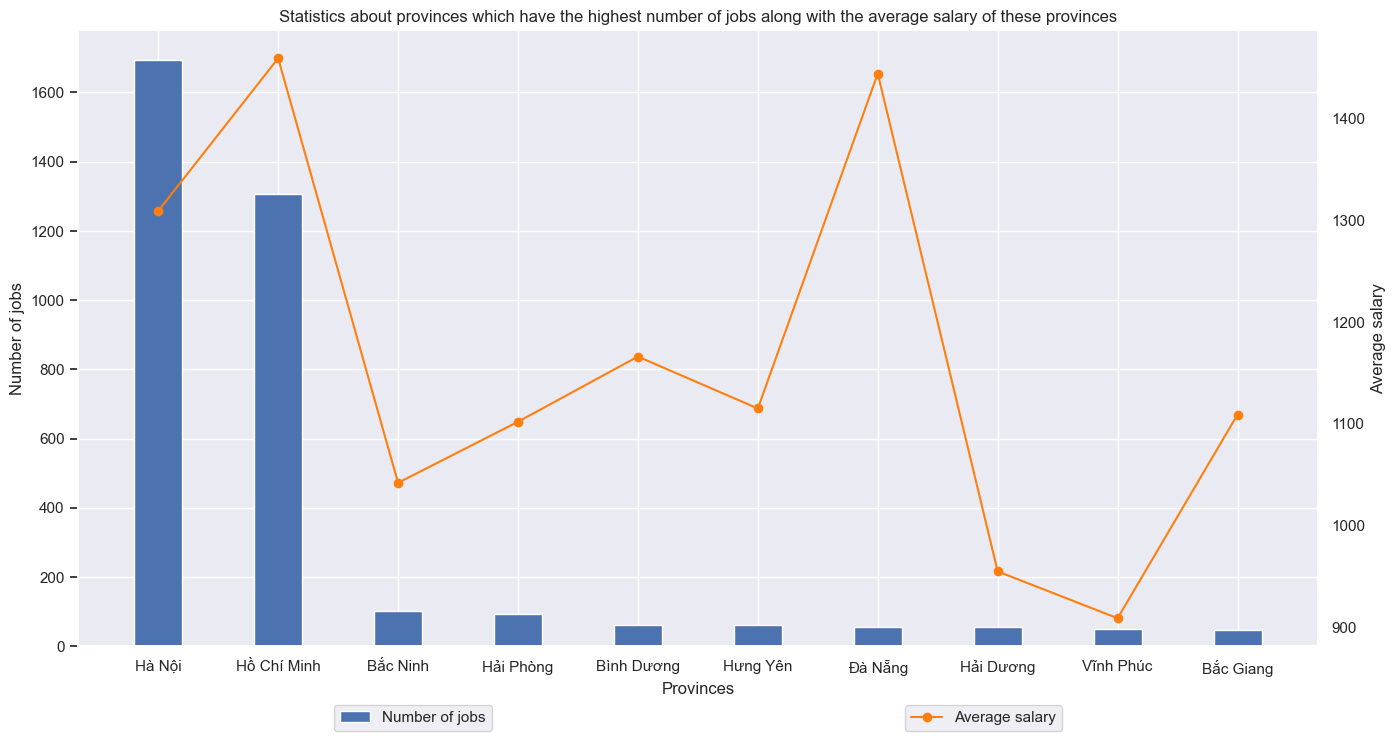

In [1033]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(locations_number_jobs_df['workingLocations'], \
       locations_number_jobs_df['numberOfjobs'],width = 0.4)
ax.set_xlabel('Provinces')
ax.set_ylabel('Number of jobs')
ax.tick_params(left=False)
ax.legend(['Number of jobs'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twinx()
ax2.plot(locations_number_jobs_df['workingLocations'], \
         locations_number_jobs_df['avgsalary'],marker='o',color='#fe7f0e')
ax2.set_ylabel('Average salary')
ax2.grid(False)
ax2.tick_params(right=False)
ax2.legend(['Average salary'],loc='lower right',bbox_to_anchor=(0.8, -0.15))
plt.title('Statistics about provinces which have the highest number of jobs \
along with the average salary of these provinces')
plt.show()

In [1034]:
temp_df = df[df['numOfApplications'] != 0]
temp_df[['industries','numOfApplications']]

industries  numOfApplications
7     {7: 'Civil/Construction', 64: 'Electrical/Elec...                 19
8     {33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...                196
9     {17: 'Executive management', 33: 'Sales', 69: ...                 51
18    {12: 'Education/Training', 47: 'Interpreter/Tr...                 23
19    {23: 'Human Resources', 30: 'Real Estate', 73:...                 39
...                                                 ...                ...
8967  {8: 'Consulting', 58: 'Auditing', 69: 'Plannin...                  7
8968  {8: 'Consulting', 58: 'Auditing', 69: 'Plannin...                  7
8969     {19: 'Export-Import', 36: 'Freight/Logistics'}                  4
8970  {8: 'Consulting', 11: 'Customer Service', 58: ...                  6
8971  {8: 'Consulting', 58: 'Auditing', 59: 'Finance...                  6

[7019 rows x 2 columns]

In [1035]:
industries_napp_df = temp_df[['industries','numOfApplications']].copy()
industries_napp_df['industries'] = industries_napp_df['industries']\
                                    .astype(str)\
                                    .apply(lambda x: list(ast.literal_eval(x).values()))
industries_napp_df = industries_napp_df.explode('industries')
industries_napp_df

industries  numOfApplications
7         Civil/Construction                 19
7     Electrical/Electronics                 19
7                 Mechanical                 19
8                      Sales                196
8                    Banking                196
...                      ...                ...
8970        Customer Service                  6
8970                Auditing                  6
8971              Consulting                  6
8971                Auditing                  6
8971      Finance/Investment                  6

[20051 rows x 2 columns]

In [1036]:
industries_njobs = industries_napp_df.groupby('industries').count().reset_index()
industries_njobs = industries_njobs.rename(columns = {'numOfApplications': 'numOfJobs'})
industries_njobs

industries  numOfJobs
0                   Accounting        672
1      Administrative/Clerical        743
2     Advertising/Promotion/PR        424
3         Agriculture/Forestry         47
4             Airlines/Tourism        118
..                         ...        ...
67          TV/Media/Newspaper        181
68          Telecommunications        105
69          Temporary/Contract         12
70  Textiles/Garments/Footwear        132
71                   Warehouse        107

[72 rows x 2 columns]

In [1037]:
industries_napp = industries_napp_df.groupby('industries').sum().reset_index()
industries_napp = industries_napp.rename(columns = {'numOfApplications': 'totalOfApplications'})
industries_napp

industries  totalOfApplications
0                   Accounting                34059
1      Administrative/Clerical                43607
2     Advertising/Promotion/PR                19944
3         Agriculture/Forestry                 1326
4             Airlines/Tourism                 3179
..                         ...                  ...
67          TV/Media/Newspaper                 8886
68          Telecommunications                 2619
69          Temporary/Contract                  905
70  Textiles/Garments/Footwear                 4952
71                   Warehouse                 5415

[72 rows x 2 columns]

In [1038]:
industries_df = pd.concat([industries_njobs, industries_napp['totalOfApplications']], axis=1)
industries_df

industries  numOfJobs  totalOfApplications
0                   Accounting        672                34059
1      Administrative/Clerical        743                43607
2     Advertising/Promotion/PR        424                19944
3         Agriculture/Forestry         47                 1326
4             Airlines/Tourism        118                 3179
..                         ...        ...                  ...
67          TV/Media/Newspaper        181                 8886
68          Telecommunications        105                 2619
69          Temporary/Contract         12                  905
70  Textiles/Garments/Footwear        132                 4952
71                   Warehouse        107                 5415

[72 rows x 3 columns]

In [1039]:
industries_highnjobs_df = industries_df.sort_values\
                    (by = 'numOfJobs', ascending = False)[:10]
industries_highnjobs_df

industries  numOfJobs  totalOfApplications
64                    Sales       1505                52059
26       Finance/Investment       1117                49998
47                Marketing        778                37414
13         Customer Service        774                28804
1   Administrative/Clerical        743                43607
0                Accounting        672                34059
38            IT - Software        649                19723
18   Electrical/Electronics        632                24116
9                   Banking        580                23551
7                  Auditing        555                26217

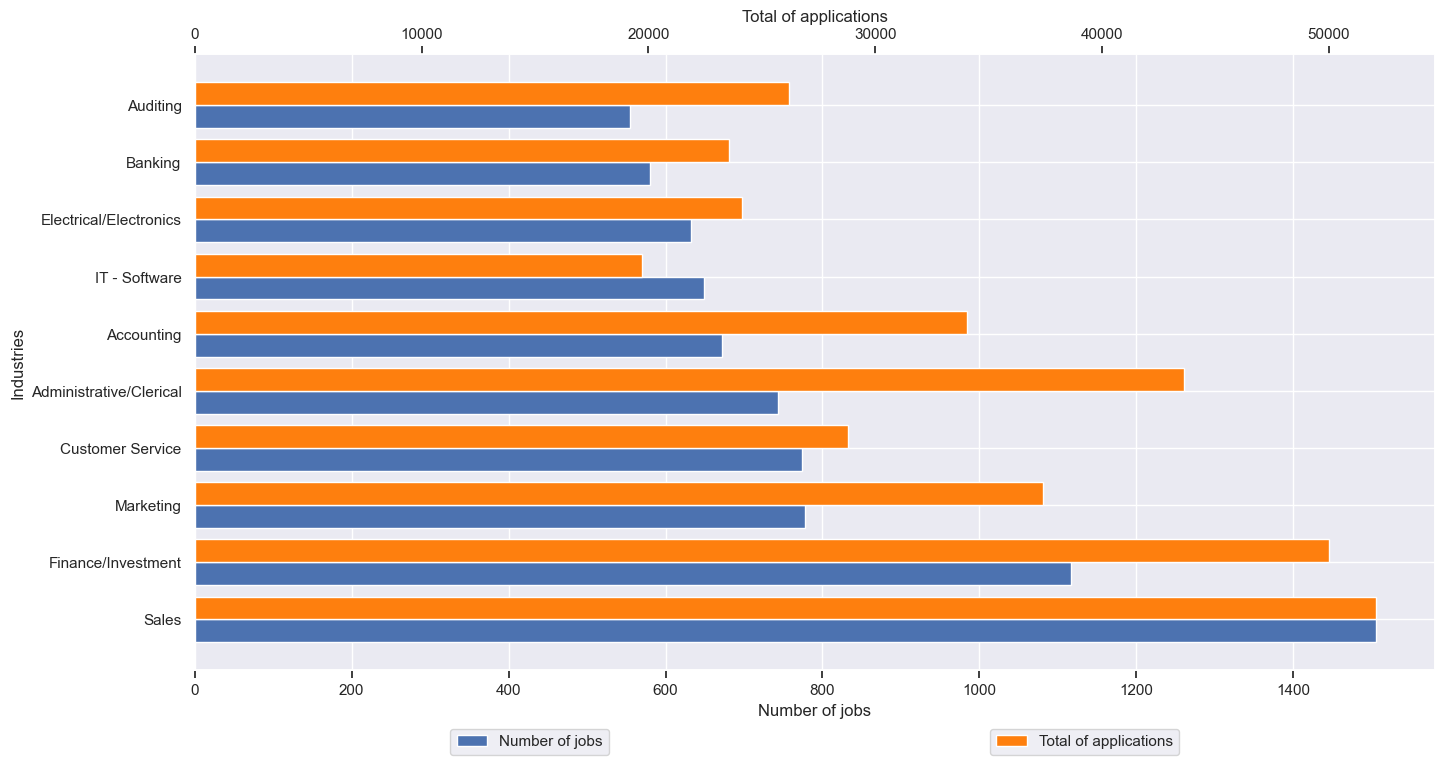

In [1040]:
fig, ax = plt.subplots(figsize=(16,8))
y_axis = np.arange(len(industries_highnjobs_df['industries']))
ax.barh(y_axis - 0.2, industries_highnjobs_df['numOfJobs'], 0.4)
ax.set_xlabel("Number of jobs")
ax.set_ylabel("Industries")
# ax.tick_params(left=False)
ax.legend(['Number of jobs'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twiny()
ax2.barh(y_axis + 0.2, industries_highnjobs_df['totalOfApplications'], 0.4,color='#fe7f0e')
ax2.set_xlabel("Total of applications")
ax2.grid(False)
# ax2.tick_params(right=False)
ax2.legend(['Total of applications'],loc='lower right',bbox_to_anchor=(0.8, -0.15))
plt.yticks(y_axis, industries_highnjobs_df['industries'])
plt.show()

In [1041]:
industries_highnapps_df = industries_df.sort_values\
                    (by = 'totalOfApplications', ascending = False)[:10]
industries_highnapps_df

industries  numOfJobs  totalOfApplications
64                    Sales       1505                52059
26       Finance/Investment       1117                49998
1   Administrative/Clerical        743                43607
47                Marketing        778                37414
0                Accounting        672                34059
13         Customer Service        774                28804
36          Human Resources        411                28347
11       Civil/Construction        490                27276
7                  Auditing        555                26217
18   Electrical/Electronics        632                24116

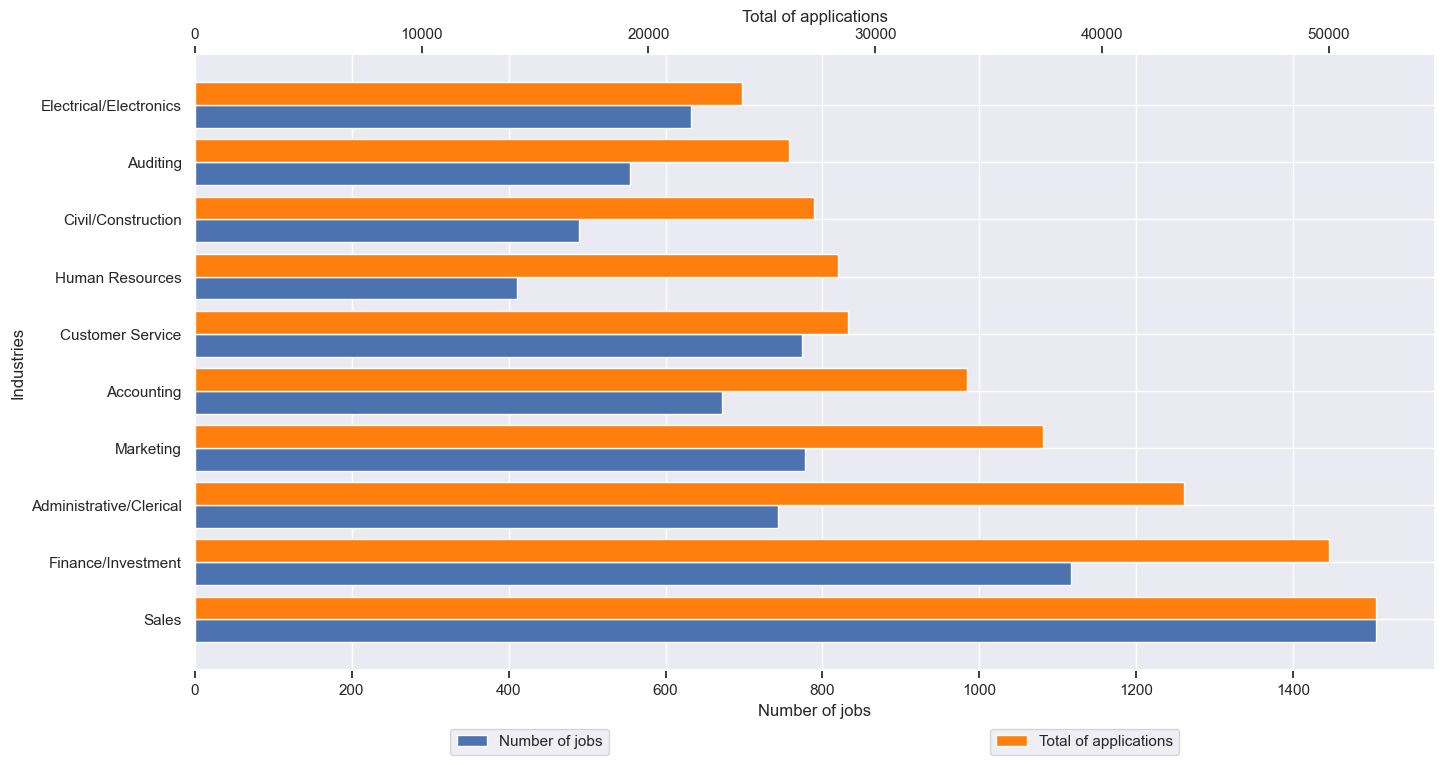

In [1042]:
fig, ax = plt.subplots(figsize=(16,8))
y_axis = np.arange(len(industries_highnapps_df['industries']))
ax.barh(y_axis - 0.2, industries_highnapps_df['numOfJobs'], 0.4)
ax.set_xlabel("Number of jobs")
ax.set_ylabel("Industries")
# ax.tick_params(left=False)
ax.legend(['Number of jobs'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twiny()
ax2.barh(y_axis + 0.2, industries_highnapps_df['totalOfApplications'], 0.4,color='#fe7f0e')
ax2.set_xlabel("Total of applications")
ax2.grid(False)
# ax2.tick_params(right=False)
ax2.legend(['Total of applications'],loc='lower right',bbox_to_anchor=(0.8, -0.15))
plt.yticks(y_axis, industries_highnapps_df['industries'])
plt.show()

In [1043]:
top_10_industries_hnapps = list(industries_highnapps_df['industries'])
top_10_industries_hnapps

['Sales',
 'Finance/Investment',
 'Administrative/Clerical',
 'Marketing',
 'Accounting',
 'Customer Service',
 'Human Resources',
 'Civil/Construction',
 'Auditing',
 'Electrical/Electronics']